In [44]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from stop_words import get_stop_words
import matplotlib.pyplot as plt
% matplotlib inline

In [45]:
# Load in the dataframes
unreliable_df = pd.read_csv("unreliable.csv", index_col=0)
unreliable_df.reset_index(inplace=True)
unreliable_df.head()

,Title,Text,Author,Source,Label
0,N.F.L. to Spend $100 Million to Address Head T...,"Under continued pressure from fans, parents an...",Ken Belson,Kaggle,Unreliable
1,Chicago Is Planning to Add Hundreds of Police ...,"CHICAGO — This city, reeling from a rising ...",Monica Davey,Kaggle,Unreliable
2,Ravens vs. Steelers - Friday/Game Status,A Potato Battery Can Light up a Room for Over ...,NaN,Kaggle,Unreliable
3,Did Judge Martha Kavanaugh ‘Rule Against’ the ...,NaN,NaN,Snopes Aggregator,Unreliable
4,A Quiet Giant of Investing Weighs In on Trump ...,He is the most successful and influential inve...,Andrew Ross Sorkin,Kaggle,Unreliable


In [46]:
reliable_df = pd.read_csv("reliable.csv", index_col=0)
reliable_df.reset_index(inplace=True)
reliable_df.head()

,Title,Text,Author,Source,Label
0,A Candidate Spurned,By the time they touched down in New Hampshire...,By MATT BAI,The New York Times,Reliable
1,Will China Trigger the Next Global Recession?,Will China Trigger the Next Global Recession? ...,Jing Jin,Kaggle,Reliable
2,The Results Are In: This Is the Best Sex Toy f...,PDF \nBy Jordan Gray | jordangrayconsulting.co...,NaN,Kaggle,Reliable
3,The De Facto US/Al Qaeda Alliance : Informa...,The De Facto US/Al Qaeda Alliance\nExclusive:...,Robert Parry,Kaggle,Reliable
4,Obama Furious After Fed-Up ‘Deplorables’ Drop ...,Obama Furious After Fed-Up ‘Deplorables’ Drop ...,Amanda Shea,Kaggle,Reliable


In [47]:
satirical_df = pd.read_csv("satirical.csv", index_col=0)
satirical_df.reset_index(inplace=True)
satirical_df.head()

,Title,Text,Author,Source,Label,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,"Men Are Not Oppressed,' Says Woman Who Has No ...",NaN,The Onion,Twitter,Satirical,NaN,NaN,NaN
1,LeBron James To Star In ‘Space Jam’ Sequel,NaN,The Onion,Twitter,Satirical,NaN,NaN,NaN
2,Single Woman Getting All Dolled Up To Watch Ro...,NaN,The Onion,Twitter,Satirical,NaN,NaN,NaN
3,Trump Slams Worldwide Jewish Conspiracy For No...,NaN,The Onion,Twitter,Satirical,NaN,NaN,NaN
4,Earth Passes Through Temporal Vortex Hurling P...,NaN,The Onion,Twitter,Satirical,NaN,NaN,NaN


In [48]:
print("There are {} unreliable articles. \n".format(unreliable_df.shape[0],df.shape[1]))

print("There are {} categories in the unreliable dataset such as:\n {}...\n".format(len(unreliable_df.Title.unique()),
                                                                           ",\n ".join(unreliable_df.Title.unique()[0:5])))

print("There are {} reliable articles. \n".format(reliable_df.shape[0],df.shape[1]))

print("There are {} categories in the reliable dataset such as:\n {}...\n".format(len(reliable_df.Title.unique()),
                                                                           ",\n ".join(reliable_df.Title.unique()[0:5])))

print("There are {} satirical articles. \n".format(satirical_df.shape[0],df.shape[1]))

print("There are {} categories in the satirical dataset such as:\n {}...\n".format(len(satirical_df.Title.unique()),
                                                                           ",\n ".join(satirical_df.Title.unique()[0:5])))

There are 19124 unreliable articles. 

There are 15197 categories in the unreliable dataset such as:
 N.F.L. to Spend $100 Million to Address Head Trauma - The New York Times,
 Chicago Is Planning to Add Hundreds of Police Officers - The New York Times,
 Ravens vs. Steelers - Friday/Game Status,
 Did Judge Martha Kavanaugh ‘Rule Against’ the Parents of Her Son’s Accuser,
 A Quiet Giant of Investing Weighs In on Trump - The New York Times...

There are 19856 reliable articles. 

There are 17728 categories in the reliable dataset such as:
 A Candidate Spurned,
 Will China Trigger the Next Global Recession?,
 The Results Are In: This Is the Best Sex Toy for Women, Ever : Conscious Life News,
 The De Facto US/Al Qaeda Alliance    : Information,
 Obama Furious After Fed-Up ‘Deplorables’ Drop 41,000-Piece Gift On Him...

There are 3281 satirical articles. 

There are 2928 categories in the satirical dataset such as:
 Men Are Not Oppressed,' Says Woman Who Has No Idea What It Like To Take Two

In [49]:
unreliable_text = " ".join(review for review in unreliable_df.Title)
print ("There are {} words in the unreliable dataset.".format(len(unreliable_text)))

reliable_text_title = " ".join(str(review) for review in reliable_df.Title)
print ("There are {} words in the titles of the reliable dataset.".format(len(reliable_text_title)))

reliable_text = " ".join(str(review) for review in reliable_df.Text)
print ("There are {} words in the text of the reliable dataset.".format(len(reliable_text)))

satirical_text = " ".join(review for review in satirical_df.Title)
print ("There are {} words in the satirical dataset.".format(len(satirical_text)))

There are 1375823 words in the unreliable dataset.
There are 1383357 words in the titles of the reliable dataset.
There are 48063176 words in the text of the reliable dataset.
There are 265211 words in the satirical dataset.


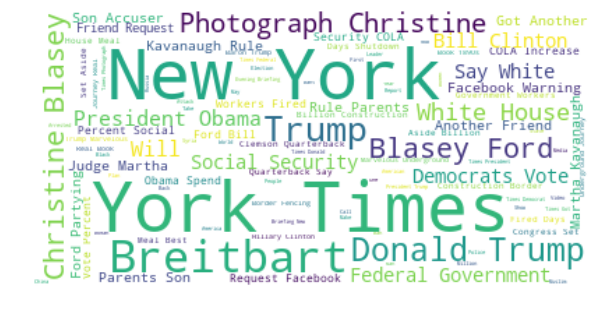

In [59]:
# Create stopword list:
#stopWords = set(stopwords.words('english'))
#stopwords = set(STOPWORDS)
#stopwords.update(["$", "Is", "Did", "Why", "What", "Who", "Where", "https"])
stop_words = get_stop_words('english')

# Generate word cloud images
unreliable_wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(unreliable_text)
unreliable_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(unreliable_text)
plt.figure(figsize=(10,10))
plt.imshow(unreliable_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

unreliable_wordcloud.to_file("Unreliable WordCloud.png")

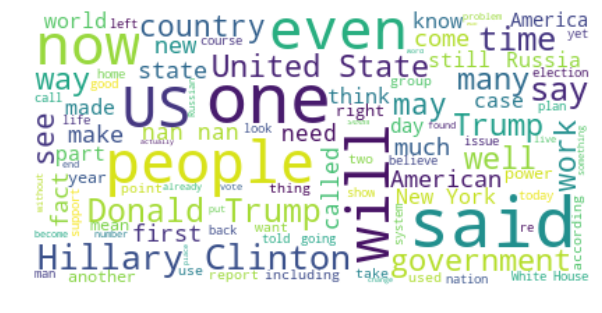

In [60]:
#stopwords = set(STOPWORDS)
#stopwords_2 = stopwords.update(["$", "Is", "Did", "Why", "What", "Who", "Where", "https", "people", "one", "will", "Even", "say", "now", "nan", "many", "well", "make"])
stop_words = get_stop_words('english')

reliable_wordcloud = WordCloud(stopwords=stopwords_2, background_color="white").generate(reliable_text)
reliable_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(reliable_text)
plt.figure(figsize=(10,10))
plt.imshow(reliable_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

reliable_wordcloud.to_file("Reliable WordCloud.png")

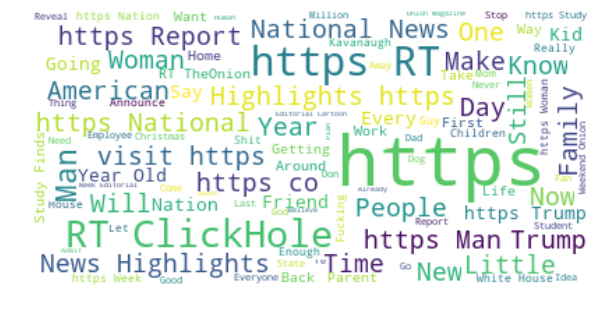

In [61]:
#stopwords = set(STOPWORDS)
#stopwords.update(["$", "Is", "Did", "Why", "What", "Who", "Where", "https", "RT", "h t t p s", "R T"])
stop_words = get_stop_words('english')

satirical_wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(satirical_text)
satirical_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(satirical_text)
plt.figure(figsize=(10,10))
plt.imshow(satirical_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

satirical_wordcloud.to_file("Satirical WordCloud.png")